Importing the necessary libraries.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Merging the data frames.

In [46]:
columns = ['HCHO_Reading', 'Location', 'Current_Date', 'Next_Date']
combined_df = []
data_frames = ['col_mat_nuw_output.csv', 'mon_kur_jaf_output.csv', 'kan_output.csv']

for i in data_frames:
    df = pd.read_csv(i, names=columns)
    combined_df.append(df)

df = pd.concat(combined_df, ignore_index=True)
df  

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
12777,NaN,Kandy Proper,2023-12-27,2023-12-28
12778,NaN,Kandy Proper,2023-12-28,2023-12-29
12779,NaN,Kandy Proper,2023-12-29,2023-12-30
12780,0.000056,Kandy Proper,2023-12-30,2023-12-31


Changing the location names into a single word.

In [47]:
df.loc[df['Location'] == "Colombo Proper", "Location"] = "Colombo"
df.loc[df['Location'] == "Deniyaya, Matara", "Location"] = "Matara"
df.loc[df['Location'] == "Nuwara Eliya Proper", "Location"] = "Nuwara Eliya"
df.loc[df['Location'] == "Bibile, Monaragala", "Location"] = "Monaragala"
df.loc[df['Location'] == "Kurunegala Proper", "Location"] = "Kurunegala"
df.loc[df['Location'] == "Jaffna Proper", "Location"] = "Jaffna"
df.loc[df['Location'] == "Kandy Proper", "Location"] = "Kandy"
df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000263,Colombo,2019-01-02,2019-01-03
2,0.000099,Colombo,2019-01-03,2019-01-04
3,0.000210,Colombo,2019-01-04,2019-01-05
4,0.000179,Colombo,2019-01-05,2019-01-06
...,...,...,...,...
12777,NaN,Kandy,2023-12-27,2023-12-28
12778,NaN,Kandy,2023-12-28,2023-12-29
12779,NaN,Kandy,2023-12-29,2023-12-30
12780,0.000056,Kandy,2023-12-30,2023-12-31


Let us check the dimensions of the data frame.

In [48]:
rows = df.shape[0]
columns = df.shape[1]

print(f"There are {rows} rows in the data frame.")
print(f"There are {columns} columns in the data frame.")

There are 12782 rows in the data frame.
There are 4 columns in the data frame.


Let us check the statistic evaluation of the HCHO reading.

In [49]:
df.describe()

,HCHO_Reading
count,7918.000000
mean,0.000119
std,0.000093
min,-0.000352
25%,0.000061
50%,0.000112
75%,0.000172
max,0.000900


Let us check the data types of the columns in the data frame.

In [50]:
df.dtypes

HCHO_Reading    float64
Location         object
Current_Date     object
Next_Date        object
dtype: object

Let us check the data frame for null values.

In [51]:
df.isnull().sum()

HCHO_Reading    4864
Location           0
Current_Date       0
Next_Date          0
dtype: int64

The current date and the next date have to be converted into the data type datetime.

In [52]:
df["Current_Date"] = pd.to_datetime(df["Current_Date"])
df["Next_Date"]  = pd.to_datetime(df["Next_Date"])
df.dtypes

HCHO_Reading           float64
Location                object
Current_Date    datetime64[ns]
Next_Date       datetime64[ns]
dtype: object

In [53]:
# let us store the years in an array
years = [2019,2020,2021,2022,2023]
# lets us store all the locations also in an array
locations = ["Colombo","Matara","Nuwara Eliya","Monaragala","Kurunegala","Jaffna","Kandy"]

for location in locations:
    print("\n")
    print(location)
    print("\n")
    print(df.loc[df["Location"] == location, "HCHO_Reading"].describe())
    print("\n")



Colombo


count    1339.000000
mean        0.000159
std         0.000099
min        -0.000229
25%         0.000093
50%         0.000151
75%         0.000221
max         0.000650
Name: HCHO_Reading, dtype: float64




Matara


count    979.000000
mean       0.000092
std        0.000097
min       -0.000259
25%        0.000037
50%        0.000081
75%        0.000139
max        0.000900
Name: HCHO_Reading, dtype: float64




Nuwara Eliya


count    741.000000
mean       0.000088
std        0.000084
min       -0.000179
25%        0.000034
50%        0.000082
75%        0.000136
max        0.000419
Name: HCHO_Reading, dtype: float64




Monaragala


count    1131.000000
mean        0.000126
std         0.000094
min        -0.000239
25%         0.000069
50%         0.000125
75%         0.000185
max         0.000535
Name: HCHO_Reading, dtype: float64




Kurunegala


count    1234.000000
mean        0.000134
std         0.000087
min        -0.000157
25%         0.000078
50%         0.000127


### Visualization of data

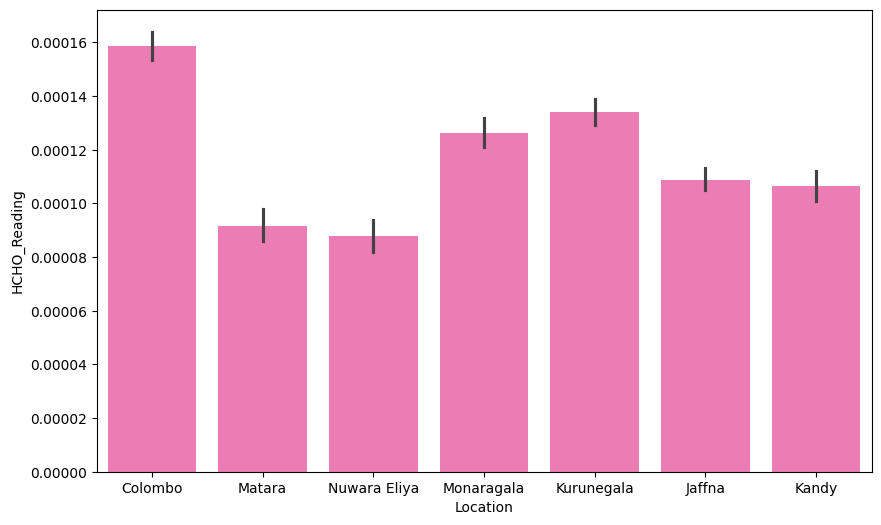

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Location", y="HCHO_Reading", color="hotpink")
plt.show()

<Axes: xlabel='HCHO_Reading', ylabel='Count'>

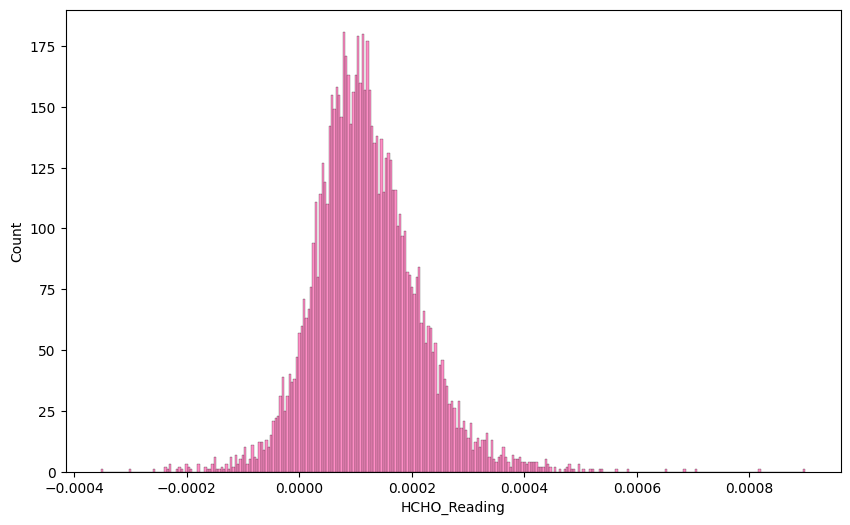

In [59]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="HCHO_Reading", bins=300, color="hotpink")

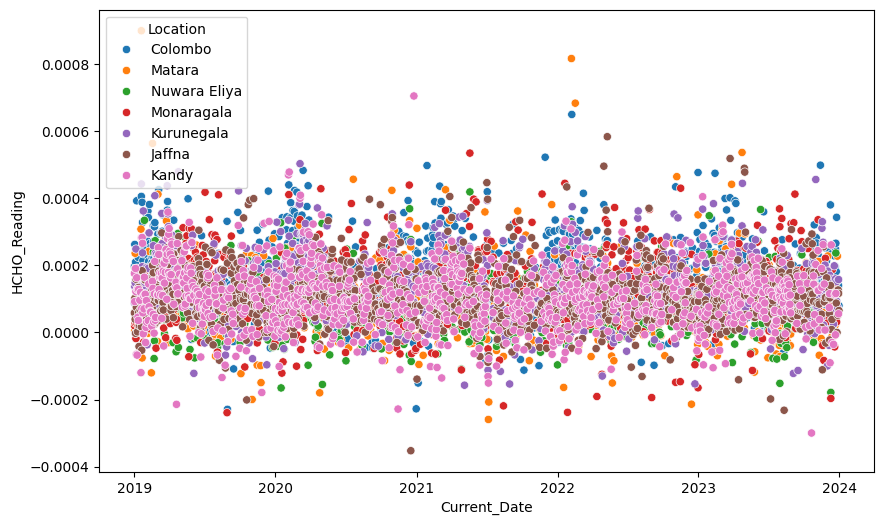

In [60]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Current_Date", y="HCHO_Reading", hue="Location", color="hotpink")
plt.show()